## 1. Importing necessary libraries

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import lightgbm #lightgbm.LGBMClassifier()

from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
#Plot ROC for each Algorithm

## 2. Import data

In [9]:
cc_payement_data = pd.read_csv('credit_card_clean.csv')
cc_payement_data

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  \
0          1    20000.0  female  university  married   24      2      2   
1          2   120000.0  female  university   single   26     -1      2   
2          3    90000.0  female  university   single   34      0      0   
3          4    50000.0  female  university  married   37      0      0   
4          5    50000.0    male  university  married   57     -1      0   
...      ...        ...     ...         ...      ...  ...    ...    ...   
29995  29996   220000.0    male  highschool  married   39      0      0   
29996  29997   150000.0    male  highschool   single   43     -1     -1   
29997  29998    30000.0    male  university   single   37      4      3   
29998  29999    80000.0    male  highschool  married   41      1     -1   
29999  30000    50000.0    male  university  married   46      0      0   

       PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         -1     -1     -2     -2     3913.0     3102.0      689.0        0.0   
1          0      0      0      2     2682.0     1725.0     2682.0     3272.0   
2          0      0      0      0    29239.0    14027.0    13559.0    14331.0   
3          0      0      0      0    46990.0    48233.0    49291.0    28314.0   
4         -1      0      0      0     8617.0     5670.0    35835.0    20940.0   
...      ...    ...    ...    ...        ...        ...        ...        ...   
29995      0      0      0      0   188948.0   192815.0   208365.0    88004.0   
29996     -1     -1      0      0     1683.0     1828.0     3502.0     8979.0   
29997      2     -1      0      0     3565.0     3356.0     2758.0    20878.0   
29998      0      0      0     -1    -1645.0    78379.0    76304.0    52774.0   
29999      0      0      0      0    47929.0    48905.0    49764.0    36535.0   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0            0.0        0.0       0.0     689.0       0.0       0.0       0.0   
1         3455.0     3261.0       0.0    1000.0    1000.0    1000.0       0.0   
2        14948.0    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0   
3        28959.0    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0   
4        19146.0    19131.0    2000.0   36681.0   10000.0    9000.0     689.0   
...          ...        ...       ...       ...       ...       ...       ...   
29995    31237.0    15980.0    8500.0   20000.0    5003.0    3047.0    5000.0   
29996     5190.0        0.0    1837.0    3526.0    8998.0     129.0       0.0   
29997    20582.0    19357.0       0.0       0.0   22000.0    4200.0    2000.0   
29998    11855.0    48944.0   85900.0    3409.0    1178.0    1926.0   52964.0   
29999    32428.0    15313.0    2078.0    1800.0    1430.0    1000.0    1000.0   

       PAY_AMT6  DEFAULT  
0           0.0        1  
1        2000.0        1  
2        5000.0        0  
3        1000.0        0  
4         679.0        0  
...         ...      ...  
29995    1000.0        0  
29996       0.0        0  
29997    3100.0        1  
29998    1804.0        1  
29999    1000.0        1  

[30000 rows x 25 columns]

In [8]:
pd.set_option('max_columns',None)

## 3. Data Understanding

### Exploring the variable
* ID : ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE: Marital status (1=married, 2=single, 3=others)

* AGE: Age in years

* PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

#### Target variable
default.payment.next.month: Default payment (1=yes, 0=no)

###### Note: NT is Taiwain Dollars

In [4]:
cc_payement_data.shape

(30000, 25)

In [6]:
cc_payement_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [7]:
cc_payement_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

## 4. Data Preparation

In [20]:
le = LabelEncoder()
cc_payement_data['SEX'] = le.fit_transform(cc_payement_data['SEX'])
cc_payement_data['EDUCATION'] = le.fit_transform(cc_payement_data['EDUCATION'])
cc_payement_data['MARRIAGE'] = le.fit_transform(cc_payement_data['MARRIAGE'])

In [21]:
cc_payement_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    0          3         0   24      2      2     -1     -1   
1   2   120000.0    0          3         2   26     -1      2      0      0   
2   3    90000.0    0          3         2   34      0      0      0      0   
3   4    50000.0    0          3         0   37      0      0      0      0   
4   5    50000.0    1          3         0   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   DEFAULT  Encoded SEX  Encoded EDUCATION  Encoded MARRIAGE  
0        1            0                  3                 0  
1        1            0                  3                 2  
2        0            0                  3                 2  
3        0            0                  3                 0  
4        0            1                  3                 0

In [24]:
cc_payement_data.drop(labels = ['Encoded SEX','Encoded EDUCATION', 'Encoded MARRIAGE'],axis = 1,inplace = True)

In [25]:
cc_payement_data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    0          3         0   24      2      2     -1   
1          2   120000.0    0          3         2   26     -1      2      0   
2          3    90000.0    0          3         2   34      0      0      0   
3          4    50000.0    0          3         0   37      0      0      0   
4          5    50000.0    1          3         0   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          1         0   39      0      0      0   
29996  29997   150000.0    1          1         2   43     -1     -1     -1   
29997  29998    30000.0    1          3         2   37      4      3      2   
29998  29999    80000.0    1          1         0   41      1     -1      0   
29999  30000    50000.0    1          3         0   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0         -1     -2     -2     3913.0     3102.0      689.0        0.0   
1          0      0      2     2682.0     1725.0     2682.0     3272.0   
2          0      0      0    29239.0    14027.0    13559.0    14331.0   
3          0      0      0    46990.0    48233.0    49291.0    28314.0   
4          0      0      0     8617.0     5670.0    35835.0    20940.0   
...      ...    ...    ...        ...        ...        ...        ...   
29995      0      0      0   188948.0   192815.0   208365.0    88004.0   
29996     -1      0      0     1683.0     1828.0     3502.0     8979.0   
29997     -1      0      0     3565.0     3356.0     2758.0    20878.0   
29998      0      0     -1    -1645.0    78379.0    76304.0    52774.0   
29999      0      0      0    47929.0    48905.0    49764.0    36535.0   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0            0.0        0.0       0.0     689.0       0.0       0.0       0.0   
1         3455.0     3261.0       0.0    1000.0    1000.0    1000.0       0.0   
2        14948.0    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0   
3        28959.0    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0   
4        19146.0    19131.0    2000.0   36681.0   10000.0    9000.0     689.0   
...          ...        ...       ...       ...       ...       ...       ...   
29995    31237.0    15980.0    8500.0   20000.0    5003.0    3047.0    5000.0   
29996     5190.0        0.0    1837.0    3526.0    8998.0     129.0       0.0   
29997    20582.0    19357.0       0.0       0.0   22000.0    4200.0    2000.0   
29998    11855.0    48944.0   85900.0    3409.0    1178.0    1926.0   52964.0   
29999    32428.0    15313.0    2078.0    1800.0    1430.0    1000.0    1000.0   

       PAY_AMT6  DEFAULT  
0           0.0        1  
1        2000.0        1  
2        5000.0        0  
3        1000.0        0  
4         679.0        0  
...         ...      ...  
29995    1000.0        0  
29996       0.0        0  
29997    3100.0        1  
29998    1804.0        1  
29999    1000.0        1  

[30000 rows x 25 columns]

In [26]:
del cc_payement_data['ID']

In [27]:
cc_payement_data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0        20000.0    0          3         0   24      2      2     -1     -1   
1       120000.0    0          3         2   26     -1      2      0      0   
2        90000.0    0          3         2   34      0      0      0      0   
3        50000.0    0          3         0   37      0      0      0      0   
4        50000.0    1          3         0   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          1         0   39      0      0      0      0   
29996   150000.0    1          1         2   43     -1     -1     -1     -1   
29997    30000.0    1          3         2   37      4      3      2     -1   
29998    80000.0    1          1         0   41      1     -1      0      0   
29999    50000.0    1          3         0   46      0      0      0      0   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0         -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1          0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2          0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3          0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4          0      0     8617.0     5670.0    35835.0    20940.0    19146.0   
...      ...    ...        ...        ...        ...        ...        ...   
29995      0      0   188948.0   192815.0   208365.0    88004.0    31237.0   
29996      0      0     1683.0     1828.0     3502.0     8979.0     5190.0   
29997      0      0     3565.0     3356.0     2758.0    20878.0    20582.0   
29998      0     -1    -1645.0    78379.0    76304.0    52774.0    11855.0   
29999      0      0    47929.0    48905.0    49764.0    36535.0    32428.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0            0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1         3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2        15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3        29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4        19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   
...          ...       ...       ...       ...       ...       ...       ...   
29995    15980.0    8500.0   20000.0    5003.0    3047.0    5000.0    1000.0   
29996        0.0    1837.0    3526.0    8998.0     129.0       0.0       0.0   
29997    19357.0       0.0       0.0   22000.0    4200.0    2000.0    3100.0   
29998    48944.0   85900.0    3409.0    1178.0    1926.0   52964.0    1804.0   
29999    15313.0    2078.0    1800.0    1430.0    1000.0    1000.0    1000.0   

       DEFAULT  
0            1  
1            1  
2            0  
3            0  
4            0  
...        ...  
29995        0  
29996        0  
29997        1  
29998        1  
29999        1  

[30000 rows x 24 columns]

## 5. Model Building

In [31]:
X = cc_payement_data.iloc[:,:-1]
y = cc_payement_data.iloc[:,-1]

In [33]:
X.shape,y.shape

((30000, 23), (30000,))

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 12,stratify = y)
#preserves the same proportions of samples in each class as observed in the original dataset.
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((24000, 23), (24000,), (6000, 23), (6000,))

## 6. Model Training

#### Training Multiple Models

In [39]:
%%time
rf_clf  = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

Wall time: 10.4 s


RandomForestClassifier()

In [40]:
%%time
adb_clf = AdaBoostClassifier()
adb_clf.fit(X_train,y_train)
#Here it stump

Wall time: 3.82 s


AdaBoostClassifier()

In [41]:
%%time
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
#Tree is grown to full depth

Wall time: 16.2 s


GradientBoostingClassifier()

In [46]:
%%time
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)

[16:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 6.65 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 7. Model Testing

In [47]:
rf_y_pred  = rf_clf.predict(X_test)
adb_y_pred = adb_clf.predict(X_test)
gb_y_pred  = gb_clf.predict(X_test)
xgb_y_pred = xgb_clf.predict(X_test)

## 8. Model Evaluation

In [54]:
print("Accuracy Score of RF   : ",round(accuracy_score(y_test,rf_y_pred),4))
print("Accuracy Score of ADB  : ",round(accuracy_score(y_test,adb_y_pred),4))
print("Accuracy Score of GB   : ",round(accuracy_score(y_test,gb_y_pred),4))
print("Accuracy Score of XGBM : ",round(accuracy_score(y_test,xgb_y_pred),4))

Accuracy Score of RF   :  0.8187
Accuracy Score of ADB  :  0.8192
Accuracy Score of GB   :  0.8153
Accuracy Score of XGBM :  0.8153


In [ ]:
#Precision, Recall #confusionmatrix

## Feature Importance

In [60]:
rf_importance  = rf_clf.feature_importances_
adb_importance = gb_clf.feature_importances_
gb_importance  = gb_clf.feature_importances_
xgb_importance = xgb_clf.feature_importances_

In [61]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [65]:
feature_imp = pd.DataFrame({'Feature'    :X_train.columns,
                            'RF_Fea_Imp' :rf_importance,
                            'ADB_Fea_Imp':adb_importance,
                            'GB_Fea_Imp' :gb_importance,
                            'XGB_Fea_Imp':xgb_importance})
feature_imp

Feature  RF_Fea_Imp  ADB_Fea_Imp  GB_Fea_Imp  XGB_Fea_Imp
0   LIMIT_BAL    0.060699     0.024132    0.024132     0.024132
1         SEX    0.012375     0.017697    0.017697     0.017697
2   EDUCATION    0.018489     0.020403    0.020403     0.020403
3    MARRIAGE    0.012955     0.020488    0.020488     0.020488
4         AGE    0.065795     0.017460    0.017460     0.017460
5       PAY_1    0.094103     0.356028    0.356028     0.356028
6       PAY_2    0.042464     0.117766    0.117766     0.117766
7       PAY_3    0.029866     0.049169    0.049169     0.049169
8       PAY_4    0.022568     0.041508    0.041508     0.041508
9       PAY_5    0.022349     0.042685    0.042685     0.042685
10      PAY_6    0.017493     0.038368    0.038368     0.038368
11  BILL_AMT1    0.060477     0.024950    0.024950     0.024950
12  BILL_AMT2    0.054532     0.020618    0.020618     0.020618
13  BILL_AMT3    0.051949     0.021075    0.021075     0.021075
14  BILL_AMT4    0.050608     0.021458    0.021458     0.021458
15  BILL_AMT5    0.049917     0.019262    0.019262     0.019262
16  BILL_AMT6    0.050809     0.019284    0.019284     0.019284
17   PAY_AMT1    0.052584     0.020551    0.020551     0.020551
18   PAY_AMT2    0.048202     0.022695    0.022695     0.022695
19   PAY_AMT3    0.047508     0.024963    0.024963     0.024963
20   PAY_AMT4    0.043793     0.020059    0.020059     0.020059
21   PAY_AMT5    0.043709     0.019935    0.019935     0.019935
22   PAY_AMT6    0.046757     0.019443    0.019443     0.019443

In [74]:
#RF_Important Feature
rf_features = feature_imp.sort_values(by = 'RF_Fea_Imp',axis=0,ascending=False)
rf_features

Feature  RF_Fea_Imp  ADB_Fea_Imp  GB_Fea_Imp  XGB_Fea_Imp
5       PAY_1    0.094103     0.356028    0.356028     0.356028
4         AGE    0.065795     0.017460    0.017460     0.017460
0   LIMIT_BAL    0.060699     0.024132    0.024132     0.024132
11  BILL_AMT1    0.060477     0.024950    0.024950     0.024950
12  BILL_AMT2    0.054532     0.020618    0.020618     0.020618
17   PAY_AMT1    0.052584     0.020551    0.020551     0.020551
13  BILL_AMT3    0.051949     0.021075    0.021075     0.021075
16  BILL_AMT6    0.050809     0.019284    0.019284     0.019284
14  BILL_AMT4    0.050608     0.021458    0.021458     0.021458
15  BILL_AMT5    0.049917     0.019262    0.019262     0.019262
18   PAY_AMT2    0.048202     0.022695    0.022695     0.022695
19   PAY_AMT3    0.047508     0.024963    0.024963     0.024963
22   PAY_AMT6    0.046757     0.019443    0.019443     0.019443
20   PAY_AMT4    0.043793     0.020059    0.020059     0.020059
21   PAY_AMT5    0.043709     0.019935    0.019935     0.019935
6       PAY_2    0.042464     0.117766    0.117766     0.117766
7       PAY_3    0.029866     0.049169    0.049169     0.049169
8       PAY_4    0.022568     0.041508    0.041508     0.041508
9       PAY_5    0.022349     0.042685    0.042685     0.042685
2   EDUCATION    0.018489     0.020403    0.020403     0.020403
10      PAY_6    0.017493     0.038368    0.038368     0.038368
3    MARRIAGE    0.012955     0.020488    0.020488     0.020488
1         SEX    0.012375     0.017697    0.017697     0.017697

In [69]:
#ADB_Important Feature
feature_imp.sort_values(by = 'ADB_Fea_Imp',axis=0,ascending=False)

Feature  RF_Fea_Imp  ADB_Fea_Imp  GB_Fea_Imp  XGB_Fea_Imp
5       PAY_1    0.094103     0.356028    0.356028     0.356028
6       PAY_2    0.042464     0.117766    0.117766     0.117766
7       PAY_3    0.029866     0.049169    0.049169     0.049169
9       PAY_5    0.022349     0.042685    0.042685     0.042685
8       PAY_4    0.022568     0.041508    0.041508     0.041508
10      PAY_6    0.017493     0.038368    0.038368     0.038368
19   PAY_AMT3    0.047508     0.024963    0.024963     0.024963
11  BILL_AMT1    0.060477     0.024950    0.024950     0.024950
0   LIMIT_BAL    0.060699     0.024132    0.024132     0.024132
18   PAY_AMT2    0.048202     0.022695    0.022695     0.022695
14  BILL_AMT4    0.050608     0.021458    0.021458     0.021458
13  BILL_AMT3    0.051949     0.021075    0.021075     0.021075
12  BILL_AMT2    0.054532     0.020618    0.020618     0.020618
17   PAY_AMT1    0.052584     0.020551    0.020551     0.020551
3    MARRIAGE    0.012955     0.020488    0.020488     0.020488
2   EDUCATION    0.018489     0.020403    0.020403     0.020403
20   PAY_AMT4    0.043793     0.020059    0.020059     0.020059
21   PAY_AMT5    0.043709     0.019935    0.019935     0.019935
22   PAY_AMT6    0.046757     0.019443    0.019443     0.019443
16  BILL_AMT6    0.050809     0.019284    0.019284     0.019284
15  BILL_AMT5    0.049917     0.019262    0.019262     0.019262
1         SEX    0.012375     0.017697    0.017697     0.017697
4         AGE    0.065795     0.017460    0.017460     0.017460

In [70]:
#GB_Important Feature
feature_imp.sort_values(by = 'GB_Fea_Imp',axis=0,ascending=False)

Feature  RF_Fea_Imp  ADB_Fea_Imp  GB_Fea_Imp  XGB_Fea_Imp
5       PAY_1    0.094103     0.356028    0.356028     0.356028
6       PAY_2    0.042464     0.117766    0.117766     0.117766
7       PAY_3    0.029866     0.049169    0.049169     0.049169
9       PAY_5    0.022349     0.042685    0.042685     0.042685
8       PAY_4    0.022568     0.041508    0.041508     0.041508
10      PAY_6    0.017493     0.038368    0.038368     0.038368
19   PAY_AMT3    0.047508     0.024963    0.024963     0.024963
11  BILL_AMT1    0.060477     0.024950    0.024950     0.024950
0   LIMIT_BAL    0.060699     0.024132    0.024132     0.024132
18   PAY_AMT2    0.048202     0.022695    0.022695     0.022695
14  BILL_AMT4    0.050608     0.021458    0.021458     0.021458
13  BILL_AMT3    0.051949     0.021075    0.021075     0.021075
12  BILL_AMT2    0.054532     0.020618    0.020618     0.020618
17   PAY_AMT1    0.052584     0.020551    0.020551     0.020551
3    MARRIAGE    0.012955     0.020488    0.020488     0.020488
2   EDUCATION    0.018489     0.020403    0.020403     0.020403
20   PAY_AMT4    0.043793     0.020059    0.020059     0.020059
21   PAY_AMT5    0.043709     0.019935    0.019935     0.019935
22   PAY_AMT6    0.046757     0.019443    0.019443     0.019443
16  BILL_AMT6    0.050809     0.019284    0.019284     0.019284
15  BILL_AMT5    0.049917     0.019262    0.019262     0.019262
1         SEX    0.012375     0.017697    0.017697     0.017697
4         AGE    0.065795     0.017460    0.017460     0.017460

In [71]:
#XGB_Important Feature
feature_imp.sort_values(by = 'XGB_Fea_Imp',axis=0,ascending=False)

Feature  RF_Fea_Imp  ADB_Fea_Imp  GB_Fea_Imp  XGB_Fea_Imp
5       PAY_1    0.094103     0.356028    0.356028     0.356028
6       PAY_2    0.042464     0.117766    0.117766     0.117766
7       PAY_3    0.029866     0.049169    0.049169     0.049169
9       PAY_5    0.022349     0.042685    0.042685     0.042685
8       PAY_4    0.022568     0.041508    0.041508     0.041508
10      PAY_6    0.017493     0.038368    0.038368     0.038368
19   PAY_AMT3    0.047508     0.024963    0.024963     0.024963
11  BILL_AMT1    0.060477     0.024950    0.024950     0.024950
0   LIMIT_BAL    0.060699     0.024132    0.024132     0.024132
18   PAY_AMT2    0.048202     0.022695    0.022695     0.022695
14  BILL_AMT4    0.050608     0.021458    0.021458     0.021458
13  BILL_AMT3    0.051949     0.021075    0.021075     0.021075
12  BILL_AMT2    0.054532     0.020618    0.020618     0.020618
17   PAY_AMT1    0.052584     0.020551    0.020551     0.020551
3    MARRIAGE    0.012955     0.020488    0.020488     0.020488
2   EDUCATION    0.018489     0.020403    0.020403     0.020403
20   PAY_AMT4    0.043793     0.020059    0.020059     0.020059
21   PAY_AMT5    0.043709     0.019935    0.019935     0.019935
22   PAY_AMT6    0.046757     0.019443    0.019443     0.019443
16  BILL_AMT6    0.050809     0.019284    0.019284     0.019284
15  BILL_AMT5    0.049917     0.019262    0.019262     0.019262
1         SEX    0.012375     0.017697    0.017697     0.017697
4         AGE    0.065795     0.017460    0.017460     0.017460

Text(0.5, 1.0, 'Feature Importance of RF')

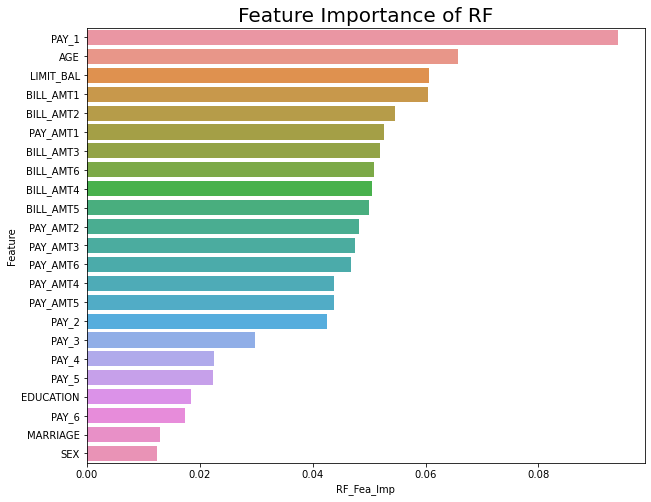

In [77]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'RF_Fea_Imp',y = 'Feature', data=rf_features)
plt.title('Feature Importance of RF',size = 20)

# TASKS

1. Compare LightGBM.
2. Plot ROC Curve for each algorithms.
3. Standardize your data and see if there in increase in accuracy and also document the training time.